In [1]:
!conda install -y bedtools bioawk samtools

Retrieving notices: done
Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.



In [2]:
%cd /home/dgh84/binfo1-work/

/home/dgh84/binfo1-work


In [3]:
!grep '	start_codon	.*	+	.*transcript_support_level "1"' ../binfo1-datapack1/gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-start.gtf
!head gencode-start.gtf

chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000134384.8
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000027036.11
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000150971.8
chr1	HAVANA	start_codon	4928137	4928139	.	+	0	ENSMUST00000081551.14
chr1	HAVANA	start_codon	5154674	5154676	.	+	0	ENSMUST00000044369.13
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000160777.8
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000027038.11
chr1	HAVANA	start_codon	6300227	6300229	.	+	0	ENSMUST00000027040.13
chr1	HAVANA	start_codon	6429555	6429557	.	+	0	ENSMUST00000133144.4
chr1	HAVANA	start_codon	6839122	6839124	.	+	0	ENSMUST00000140079.8


In [4]:
!grep '	exon	.*	+	' ../binfo1-datapack1/gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-plusexon.gtf
!head gencode-plusexon.gtf

chr1	HAVANA	exon	3143476	3144545	.	+	.	ENSMUST00000193812.2
chr1	ENSEMBL	exon	3172239	3172348	.	+	.	ENSMUST00000082908.3
chr1	HAVANA	exon	3322980	3323459	.	+	.	ENSMUST00000192857.2
chr1	HAVANA	exon	3536810	3536910	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3583628	3583776	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3602018	3602943	.	+	.	ENSMUST00000192183.2
chr1	HAVANA	exon	3750378	3752011	.	+	.	ENSMUST00000193244.2
chr1	HAVANA	exon	3822233	3824583	.	+	.	ENSMUST00000194454.2
chr1	HAVANA	exon	4566774	4569601	.	+	.	ENSMUST00000193450.2
chr1	HAVANA	exon	4567697	4567877	.	+	.	ENSMUST00000194935.2


In [5]:
!bedtools intersect -a gencode-start.gtf -b gencode-plusexon.gtf -wa -wb | \
 awk -F'	' -v OFS='	' '$9 == $18 { print $10, $13-1, $14, $18, $4-1, $16; }' | \
 sort -k1,1 -k2,3n -k4,4 > gencode-exons-containing-startcodon.bed
!head gencode-exons-containing-startcodon.bed; tail gencode-exons-containing-startcodon.bed

chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4928036	4928199	ENSMUST00000081551.14	4928136	+
chr1	5154639	5154786	ENSMUST00000044369.13	5154673	+
chr1	5659227	5659528	ENSMUST00000027038.11	5659271	+
chr1	5659257	5659528	ENSMUST00000160777.8	5659271	+
chr1	6300182	6300297	ENSMUST00000027040.13	6300226	+
chr1	6429441	6429738	ENSMUST00000133144.4	6429554	+
chr1	6839121	6839176	ENSMUST00000043578.13	6839121	+
chrY	80939672	80939804	ENSMUST00000185340.2	80939686	+
chrY	81470683	81470815	ENSMUST00000187135.2	81470697	+
chrY	82237903	82238035	ENSMUST00000185636.2	82237917	+
chrY	83043623	83043755	ENSMUST00000187165.2	83043637	+
chrY	84109956	84110088	ENSMUST00000185776.7	84109970	+
chrY	84759361	84759493	ENSMUST00000186110.2	84759375	+
chrY	86074448	86074580	ENSMUST00000188754.2	86074462	+
chrY	87129500	87129632	ENSMUST00000189543.7	87129514	+
chrY	87563647	87563779	ENSMUST0000

In [6]:
!(samtools view -H ../binfo1-datapack1/RPF-siLuc.bam; \
  samtools view -F20 ../binfo1-datapack1/RPF-siLuc.bam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 samtools view -b -o filtered-RPF-siLuc.bam

In [7]:
!ls -al *RPF-siLuc.bam

-rw-r--r-- 1 dgh84 dgh84 1055123479 May  7 16:34 RPF-siLuc.bam
-rw-r--r-- 1 dgh84 dgh84  572853320 May 15 12:57 filtered-RPF-siLuc.bam


In [8]:
!bedtools genomecov -ibam filtered-RPF-siLuc.bam -bg -5 > fivepcounts-RPF-siLuc.bed
!head fivepcounts-RPF-siLuc.bed

chr1	3176534	3176535	1
chr1	3196256	3196257	1
chr1	3221526	3221527	1
chr1	3221542	3221543	2
chr1	3221545	3221546	3
chr1	3221546	3221547	2
chr1	3221548	3221550	1
chr1	3221571	3221572	1
chr1	3221897	3221898	1
chr1	3221994	3221995	1


In [9]:
!bedtools intersect -a fivepcounts-RPF-siLuc.bed -b gencode-exons-containing-startcodon.bed \
 -wa -wb -nonamecheck > fivepcounts-filtered-RPF-siLuc.txt
!head fivepcounts-filtered-RPF-siLuc.txt

chr1	4878048	4878049	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878048	4878049	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878077	4878078	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878101	4878102	4	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878101	4878102	4	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878101	4878102	4	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878103	4878104	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878103	4878104	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+


In [10]:
import pandas as pd

cols = [
    "chr", "read_start", "read_end", "count",
    "exon_chr", "exon_start", "exon_end", "transcript_id",
    "start_codon", "strand"
]

df = pd.read_csv("fivepcounts-filtered-RPF-siLuc.txt", sep="\t", header=None, names=cols)

In [11]:
# 5' end 좌표에서 start codon 좌표를 뺌 → start codon 기준 상대 거리
df["distance_from_start"] = df["read_start"] - df["start_codon"]

In [12]:
# 같은 위치에 여러 read가 있을 수 있으므로 count 합산
histogram = df.groupby("distance_from_start")["count"].sum()

# 시각화 범위 제한 (예: -30 ~ +30 nt)
histogram = histogram[(histogram.index >= -30) & (histogram.index <= 30)]

TypeError: _AxesBase.set_xlim() takes from 1 to 3 positional arguments but 4 were given

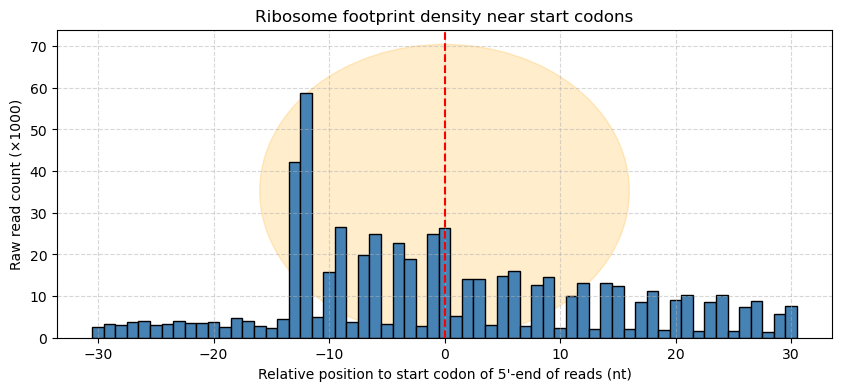

In [38]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

plt.figure(figsize=(10, 4))

# 현재 그래프 영역을 ax로 받아서 그 위에 patch 추가 가능
ax = plt.gca()

# ✅ 반투명한 타원 강조 (x=0, y는 중간 높이)
ellipse = Ellipse(
    xy=(0, (histogram.values / 1000).max() * 0.6),  # 중심 (x=0)
    width=32,                                       # x축 길이 (약 -15 ~ +15)
    height=(histogram.values / 1000).max() * 1.2,   # y축 길이
    color='orange',
    alpha=0.2,
    zorder=0
)
ax.add_patch(ellipse)

# 히스토그램 막대
ax.bar(histogram.index, histogram.values / 1000, color="steelblue", edgecolor="black", width=1)

# 중심선
ax.axvline(0, color='red', linestyle='--', linewidth=1.5, label='Start codon')

# 라벨 등
ax.set_title("Ribosome footprint density near start codons")
ax.set_xlabel("Relative position to start codon of 5'-end of reads (nt)")
ax.set_ylabel("Raw read count (×1000)")
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlim(-50, 50, 10)
ax.legend()
plt.tight_layout()
plt.show()

In [39]:
# 파일이 있는 위치, 크기 확인
!pwd
!ls -l gencode-start.gtf

# 내용 확인
!head gencode-start.gtf

# 조건 없이 start_codon만 확인
!grep start_codon ../binfo1-datapack1/gencode.gtf | head

/home/dgh84/binfo1-work
-rw-r--r-- 1 dgh84 dgh84 1063832 May 15 12:54 gencode-start.gtf
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000134384.8
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000027036.11
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000150971.8
chr1	HAVANA	start_codon	4928137	4928139	.	+	0	ENSMUST00000081551.14
chr1	HAVANA	start_codon	5154674	5154676	.	+	0	ENSMUST00000044369.13
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000160777.8
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000027038.11
chr1	HAVANA	start_codon	6300227	6300229	.	+	0	ENSMUST00000027040.13
chr1	HAVANA	start_codon	6429555	6429557	.	+	0	ENSMUST00000133144.4
chr1	HAVANA	start_codon	6839122	6839124	.	+	0	ENSMUST00000140079.8
chr1	HAVANA	start_codon	3741569	3741571	.	-	0	gene_id "ENSMUSG00000051951.6"; transcript_id "ENSMUST00000070533.5"; gene_type "protein_coding"; gene_name "Xkr4"; transcript_type "protein_coding"; transcript_name "Xkr4-201"; exon_number 1